## Importing Reaquired Modules

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data, breast_cancer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM

## Loading and Visualising Data

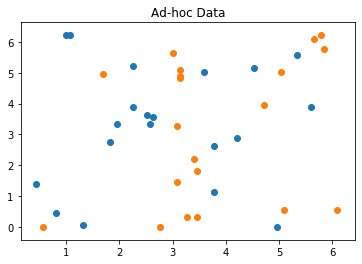

In [ ]:
feature_dim = 2    # Number of input features
sample_total, train_data, test_data, labels = ad_hoc_data(training_size=20, test_size=10,
                                                         n=feature_dim, gap=0.3, plot_data=True)

## Loading Sample Data
We need to do this in order to understand how many classes are there in the dataset. Further, it also helps us understand the labels for each of the classes in the dataset.

In [ ]:
sample_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
data_pts, class2label = split_dataset_to_data_and_labels(sample_test_data)
print("Classes and corresponding labels are:")
for c in class2label:
    print(f"Class: {c}, Label: {class2label[c]}")

Classes and corresponding labels are:
Class: A, Label: 0
Class: B, Label: 1


## Creating Feature Map and Model

In [ ]:
seed = 10598  # Setting seed to ensure reproducable results

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, train_data, test_data, data_pts[0])

## Initailizing Backend and Invoking Model

In [ ]:
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

## Collecting and Displaying Results

In [ ]:
result = qsvm.run(quantum_instance)

print(f"Testing Accuracy: {result['testing_accuracy'] * 100}%")
print("Prediction on Datapoints:")
print(f"Ground Truth: {map_label_to_class_name(data_pts[1], qsvm.label_to_class)}")
print(f"Predictions:  {result['predicted_classes']}")

Testing Accuracy: 100.0%
Prediction on Datapoints:
Ground Truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
Predictions:  ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


## Displaying Feature Mapping Kernel
The collection of inner products between linear mappings of data points, onto the mapping space is called the kernel.

Trained Kernel Matrix:


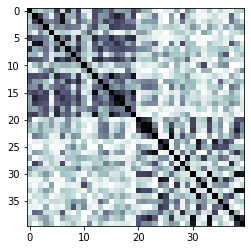

In [ ]:
print("Trained Kernel Matrix:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()